# Test Model

### Notes:
1. Output metrics need to be given in SDR too
2. SNR's below 0 have high noise levels instead of low music levels - signal levels should be more randomised throughout the whole traning set. I'll to this by normalising the waveform after adding the noise, and then randomising the level to between 0 and -5 dB - this will allow me to double the training data from MUSDB18 by augmenting with different levels and noise masking.
3. use just MUSDB18 so I can present this as research.   
4. Given that I'm using the ESC50 set, i should be able to find what noise is what so I can label them when evaluating

In [1]:
import sys
import os

# Detect Google Colab
if "google.colab" in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Detect Google Colab
if "google.colab" in sys.modules:
    print("Running in Google Colab...")
    os.system("git clone https://github.com/CiaranMaloy/audioautoencoder")
    os.chdir("/content/audioautoencoder/")
    os.system("git pull")
    os.system("git checkout dataset-generation-fix")
    os.system("git pull origin dataset-generation-fix")
    #os.system("pip install --upgrade torchmetrics")
else:
    print("Running locally...")
    os.system("git pull origin dataset-generation-fix")
    #os.system("pip install --upgrade torchmetrics")


Running in Google Colab...


In [3]:
import sys
sys.path.append('/content/audioautoencoder')
sys.path.append('/content/audioautoencoder/audioautoencoder')

Notes on testing:
1. SDR is missing as a metric

## Load Model

In [4]:
from audioautoencoder.models.UNetConv4 import *
from audioautoencoder.training import DenoisingLoader

In [5]:
import torch

In [6]:
model_name = 'UNetConv4'
SNRdB_load = [-10, 10]
SNRdB = SNRdB_load
load_file = 'Autoencodermodel_earlystopping.pth'


load_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Comparison/Checkpoints_{model_name}_{SNRdB_load[0]}-{SNRdB_load[1]}/{load_file}'

In [7]:
# Add the custom class to the safe globals list
torch.serialization.add_safe_globals([UNetConv4])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetConv4(in_channels=4, out_channels=4).to(device)

# Now load your checkpoint normally
denoiser = DenoisingLoader(model, load_path)
model = denoiser.model
print('Loaded Model')

# Example input (batch_size=1, channels=2, height=1025, width=175)
noisy_input = torch.randn(2, 4, 1025 // 4, 175)

denoised_output = denoiser.denoise(noisy_input)
print(denoised_output.shape)

Loaded model from /content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Comparison/Checkpoints_UNetConv4_-10-10/Autoencodermodel_earlystopping.pth
Loaded Model
torch.Size([2, 4, 256, 175])


In [10]:
IMPORT_TEST_NOISY = True
load_dataframe = False
max_file_size_gb = 50

In [11]:
from audioautoencoder.datasets.utils import *
from audioautoencoder.data import *
from audioautoencoder.data_management import *
from audioautoencoder.generate_dataset import *

In [12]:
train_diffusion = False
SNRdB_load = [-10, 10]
SNRdBs = [[-10, 10]] # SNR random range
#load_file = 'Autoencodermodel_earlystopping.pth'
load_file = 'Autoencodermodel_checkpoint.pth'

folder = 'remapped-signal-level' # sep

output_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Comparison/Checkpoints_{model_name}_{SNRdB_load[0]}-{SNRdB_load[1]}/'
scaler_file = output_path + "scalers.pkl"  # Static filename since it's unique per run
os.makedirs(os.path.dirname(scaler_file), exist_ok=True)
source_folder = f"/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_{folder}/SNRdB_{SNRdB[0]}-{SNRdB[1]}/"
source_path = source_folder + "test/"

In [13]:
destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/"

from google.colab import drive

if IMPORT_TEST_NOISY:
  if not os.path.exists(destination_path):
    combine_h5_files_spectrograms(source_path, destination_path, max_file_size_gb=max_file_size_gb)

Created new file: /content/SNRdB_-10-10/test/combined_000.h5


Processing:   0%|          | 0/201 [00:00<?, ?it/s]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   0%|          | 1/201 [00:42<2:21:10, 42.35s/it, samples=500, size=0.668 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   1%|          | 2/201 [01:22<2:16:55, 41.29s/it, samples=1000, size=1.336 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   1%|▏         | 3/201 [01:56<2:03:56, 37.56s/it, samples=1500, size=2.005 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   2%|▏         | 4/201 [02:36<2:06:41, 38.58s/it, samples=1999, size=2.672 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   2%|▏         | 5/201 [03:16<2:07:40, 39.08s/it, samples=2499, size=3.34 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   3%|▎         | 6/201 [03:47<1:58:27, 36.45s/it, samples=2999, size=4.008 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   3%|▎         | 7/201 [04:18<1:52:06, 34.67s/it, samples=3499, size=4.676 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   4%|▍         | 8/201 [04:48<1:46:51, 33.22s/it, samples=3998, size=5.343 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   4%|▍         | 9/201 [05:30<1:55:21, 36.05s/it, samples=4498, size=6.011 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   5%|▍         | 10/201 [06:10<1:58:14, 37.14s/it, samples=4997, size=6.678 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   5%|▌         | 11/201 [06:49<1:59:49, 37.84s/it, samples=5497, size=7.347 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   6%|▌         | 12/201 [07:30<2:02:07, 38.77s/it, samples=5997, size=8.015 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   6%|▋         | 13/201 [08:12<2:03:48, 39.52s/it, samples=6497, size=8.683 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   7%|▋         | 14/201 [08:50<2:02:30, 39.31s/it, samples=6997, size=9.351 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   7%|▋         | 15/201 [09:33<2:05:20, 40.43s/it, samples=7497, size=10.019 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   8%|▊         | 16/201 [10:14<2:04:45, 40.46s/it, samples=7997, size=10.688 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   8%|▊         | 17/201 [10:59<2:08:44, 41.98s/it, samples=8497, size=11.356 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   9%|▉         | 18/201 [11:39<2:06:15, 41.40s/it, samples=8997, size=12.024 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:   9%|▉         | 19/201 [12:12<1:57:13, 38.65s/it, samples=9497, size=12.692 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  10%|▉         | 20/201 [12:53<1:59:10, 39.51s/it, samples=9997, size=13.361 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  10%|█         | 21/201 [13:33<1:58:46, 39.59s/it, samples=10497, size=14.029 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  11%|█         | 22/201 [14:02<1:48:32, 36.38s/it, samples=10997, size=14.697 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  11%|█▏        | 23/201 [14:43<1:51:47, 37.68s/it, samples=11496, size=15.364 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  12%|█▏        | 24/201 [15:23<1:53:20, 38.42s/it, samples=11996, size=16.032 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  12%|█▏        | 25/201 [16:05<1:56:16, 39.64s/it, samples=12496, size=16.7 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  13%|█▎        | 26/201 [16:49<1:58:52, 40.76s/it, samples=12996, size=17.369 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  13%|█▎        | 27/201 [17:30<1:58:21, 40.81s/it, samples=13496, size=18.037 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  14%|█▍        | 28/201 [18:10<1:57:20, 40.70s/it, samples=13995, size=18.704 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  14%|█▍        | 29/201 [18:41<1:48:26, 37.83s/it, samples=14495, size=19.372 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  15%|█▍        | 30/201 [19:23<1:51:28, 39.11s/it, samples=14995, size=20.04 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  15%|█▌        | 31/201 [20:03<1:51:19, 39.29s/it, samples=15495, size=20.709 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  16%|█▌        | 32/201 [20:33<1:42:59, 36.57s/it, samples=15995, size=21.377 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  16%|█▋        | 33/201 [21:15<1:46:38, 38.09s/it, samples=16494, size=22.044 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  17%|█▋        | 34/201 [21:55<1:47:54, 38.77s/it, samples=16994, size=22.712 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  17%|█▋        | 35/201 [22:37<1:49:57, 39.74s/it, samples=17494, size=23.38 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  18%|█▊        | 36/201 [23:20<1:51:52, 40.68s/it, samples=17994, size=24.048 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  18%|█▊        | 37/201 [24:00<1:50:20, 40.37s/it, samples=18494, size=24.717 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  19%|█▉        | 38/201 [24:42<1:51:37, 41.09s/it, samples=18994, size=25.385 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  19%|█▉        | 39/201 [25:24<1:51:00, 41.11s/it, samples=19493, size=26.052 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  20%|█▉        | 40/201 [26:06<1:51:30, 41.55s/it, samples=19993, size=26.72 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  20%|██        | 41/201 [26:48<1:50:46, 41.54s/it, samples=20493, size=27.388 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  21%|██        | 42/201 [27:32<1:52:06, 42.30s/it, samples=20993, size=28.056 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  21%|██▏       | 43/201 [28:12<1:49:49, 41.70s/it, samples=21493, size=28.725 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  22%|██▏       | 44/201 [28:42<1:40:01, 38.23s/it, samples=21993, size=29.393 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  22%|██▏       | 45/201 [29:23<1:41:39, 39.10s/it, samples=22493, size=30.061 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  23%|██▎       | 46/201 [30:03<1:41:31, 39.30s/it, samples=22993, size=30.729 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  23%|██▎       | 47/201 [30:33<1:33:56, 36.60s/it, samples=23493, size=31.398 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  24%|██▍       | 48/201 [31:15<1:37:18, 38.16s/it, samples=23993, size=32.066 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  24%|██▍       | 49/201 [31:28<1:17:44, 30.69s/it, samples=23993, size=32.066 GB]

File:/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_remapped-signal-level/SNRdB_-10-10/test/test-SNRdB_-10-10_20250408_161730.h5 skipped...

Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  25%|██▍       | 50/201 [32:09<1:24:39, 33.64s/it, samples=24493, size=32.734 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  25%|██▌       | 51/201 [32:38<1:20:34, 32.23s/it, samples=24992, size=33.401 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  26%|██▌       | 52/201 [33:19<1:26:49, 34.97s/it, samples=25492, size=34.069 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  26%|██▋       | 53/201 [33:50<1:22:53, 33.61s/it, samples=25992, size=34.737 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  27%|██▋       | 54/201 [34:30<1:26:55, 35.48s/it, samples=26492, size=35.406 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  27%|██▋       | 55/201 [35:13<1:32:30, 38.02s/it, samples=26992, size=36.074 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  28%|██▊       | 56/201 [35:54<1:33:27, 38.67s/it, samples=27492, size=36.742 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  28%|██▊       | 57/201 [36:35<1:34:36, 39.42s/it, samples=27992, size=37.41 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  29%|██▉       | 58/201 [37:04<1:26:29, 36.29s/it, samples=28492, size=38.079 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  29%|██▉       | 59/201 [37:48<1:31:24, 38.62s/it, samples=28992, size=38.747 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  30%|██▉       | 60/201 [38:18<1:25:02, 36.19s/it, samples=29492, size=39.415 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  30%|███       | 61/201 [39:00<1:28:04, 37.75s/it, samples=29992, size=40.083 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  31%|███       | 62/201 [39:40<1:29:01, 38.43s/it, samples=30492, size=40.752 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  31%|███▏      | 63/201 [40:10<1:22:51, 36.03s/it, samples=30992, size=41.42 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  32%|███▏      | 64/201 [40:41<1:19:00, 34.60s/it, samples=31492, size=42.088 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  32%|███▏      | 65/201 [41:17<1:19:05, 34.90s/it, samples=31992, size=42.756 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  33%|███▎      | 66/201 [41:59<1:23:22, 37.06s/it, samples=32492, size=43.424 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  33%|███▎      | 67/201 [42:41<1:25:46, 38.41s/it, samples=32992, size=44.093 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  34%|███▍      | 68/201 [43:24<1:28:06, 39.75s/it, samples=33492, size=44.761 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  34%|███▍      | 69/201 [44:06<1:29:13, 40.56s/it, samples=33992, size=45.429 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  35%|███▍      | 70/201 [44:47<1:28:28, 40.52s/it, samples=34492, size=46.097 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  35%|███▌      | 71/201 [45:29<1:29:17, 41.21s/it, samples=34992, size=46.766 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  36%|███▌      | 72/201 [46:11<1:28:36, 41.22s/it, samples=35492, size=47.434 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  36%|███▋      | 73/201 [46:41<1:21:03, 38.00s/it, samples=35992, size=48.102 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  37%|███▋      | 74/201 [47:12<1:16:03, 35.94s/it, samples=36492, size=48.77 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  37%|███▋      | 75/201 [47:42<1:11:38, 34.12s/it, samples=36992, size=49.439 GB]


Attempt 1 failed: Timeout after 5 seconds. Retrying in 3 seconds.


Processing:  37%|███▋      | 75/201 [48:22<1:21:15, 38.70s/it, samples=37376, size=49.952 GB]


Finished combining files into 1 output files in /content/SNRdB_-10-10/test/


In [14]:
from audioautoencoder.datasets.utils import *

In [15]:
dataset_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/combined_000.h5"

In [16]:
if os.path.exists(scaler_file):
    print("Loading existing scalers...")
    scalers = load_scalers(scaler_file)
else:
    print("Training new scalers...")
    scalers = train_scalers_separation(dataset_path, sample_size=8000)
    save_scalers(scalers, scaler_file)

Loading existing scalers...


In [17]:
if IMPORT_TEST_NOISY:
    print("Loading existing scalers...")
    scalers = load_scalers(scaler_file)
    test_loader = ChannelDatasetLoader(
          dataset_path=dataset_path,
          scalers=scalers,
          output_time_length=175,
          channels=1,
          snr_db=SNRdB,
          subset=False,
          batch_size=4
      )

    print(f"Training set size: {len(test_loader.train_dataset)}")
    print(f"Validation set size: {len(test_loader.val_dataset)}")

Loading existing scalers...
Training set size: 29900
Validation set size: 7476
Training set size: 29900
Validation set size: 7476


In [18]:
import os
os.system("pip install --upgrade torchmetrics")

0

In [19]:
from audioautoencoder.testing import *

In [20]:
if load_dataframe:
  df_subset = pd.read_csv(output_path + f"df_subset_SNRdB_{SNRdB[0]}-{SNRdB[1]}.csv")

## Test Model

Use a large amount of data for a general L1 score to be recorded as an overall performance

In [21]:
if not load_dataframe:
  criterion = nn.L1Loss()
  loss = test_model_gpu(model, test_loader.train_loader, criterion, scalers)
  print(f"Test Loss: {loss}")

Testing: 100%|██████████| 7475/7475 [11:48<00:00, 10.55batch/s, loss=0.2048]

Test Loss: 0.1581533588060368


   Epoch            Learning Rate  Train Loss  Validation Loss  Ref Loss  \
0      1                  [0.001]    0.229365         0.194442  0.328728   
1      2  [0.0009046039886902864]    0.196142         0.183647  0.322054   
2      3  [0.0006548539886902864]    0.183388         0.172679  0.315959   
3      4  [0.0003461460113097139]    0.174763         0.167462  0.310576   
4      5  [9.639601130971382e-05]    0.169369         0.165330  0.306149   

   KL Beta  
0     0.00  
1     0.01  
2     0.02  
3     0.03  
4     0.04  


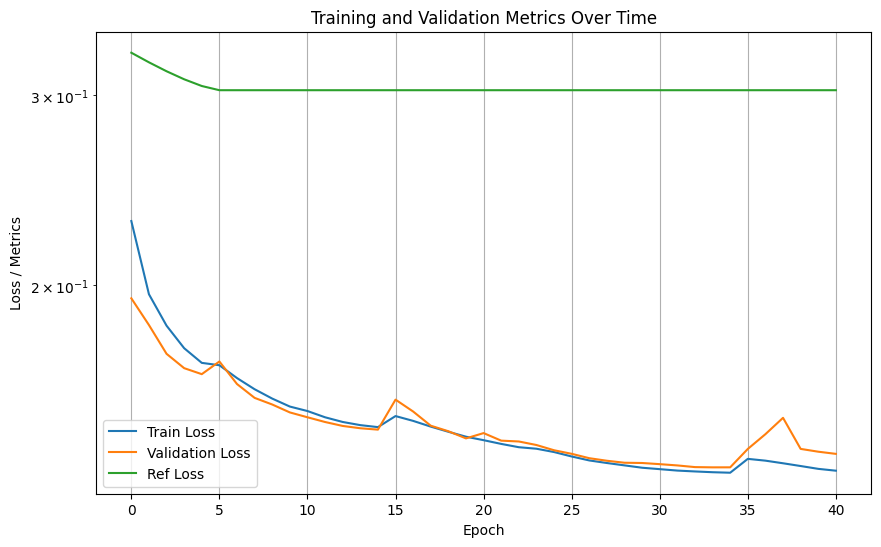

In [22]:
from audioautoencoder.plotting import *
csv_file_path = output_path + "training_log.csv"
plot_training_log(csv_file_path)

Use the val split as data for the more processing intensive df_eval generation, for a more in depth performance analysis

In [23]:
if not load_dataframe:
  criterion = nn.L1Loss()
  loss, df_eval = test_model(model, test_loader.val_loader, criterion, scalers)

Testing: 100%|██████████| 1869/1869 [03:17<00:00,  9.45batch/s, loss=0.2321]


In [24]:
if not load_dataframe:
  # Assuming `df` is your original dataframe
  #df_eval["Improvement"] = df_eval["l1_outvstar"] df_eval["l1_invstar"]  # Higher SDR is better
  subset_columns = ["instance", "l1_invstar", "l1_outvstar", "l1_invstar_4k", "l1_outvstar_4k", "l1_invstar_full", "l1_outvstar_full",  "filename", "snr_db"] #"Improvement"]
  df_subset = df_eval#[subset_columns]

In [25]:
if not load_dataframe:
  # Create a function to map filename to a class
  def get_class_from_filename(filename, classes):
      for keyword in classes:
          if keyword in filename:
              return keyword
      return 'Unknown'  # Default if no match found

  df_subset[['filename_audio', 'filename_noise']] = pd.DataFrame(df_subset['filename'].tolist(), index=df_subset.index)
  df_subset['filename_audio'] = df_subset['filename_audio'].apply(lambda x: x.decode('utf-8'))
  df_subset['filename_noise'] = df_subset['filename_noise'].apply(lambda x: x.decode('utf-8'))

  classes = ['mixture', 'vocals', 'drums', 'guitar', 'bass', 'piano', 'electric_guitar', 'acoustic_guitar', 'synthesizer', 'strings', 'brass']
  df_subset['audio_class'] = df_subset['filename_audio'].apply(lambda x: get_class_from_filename(x, classes))

  classes = ['0707', 'Rain', 'Crowd', 'Water', 'Ice']
  df_subset['noise_class'] = df_subset['filename_noise'].apply(lambda x: get_class_from_filename(x, classes))


In [26]:
df_subset["Improvement_L1"] = df_subset["l1_invstar"] - df_subset["l1_outvstar"]  # Lower L1 loss is better
df_subset["Improvement_L1_4k"] = df_subset["l1_invstar_4k"] - df_subset["l1_outvstar_4k"]  # Lower L1 loss is better
df_subset["Improvement_L1_full"] = df_subset["l1_invstar_full"] - df_subset["l1_outvstar_full"]  # Lower L1 loss is better

## Plot Results

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set minimal theme
sns.set_theme(style="white", font_scale=1.2)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_eval = df_subset.copy()

# Round SNR to the nearest 2.5 dB
df_eval["snr_db_rounded"] = (df_eval["snr_db"] / 2.5).round() * 2.5

def compute_stats(df, class_col):
    grouped = df.groupby(["snr_db_rounded", class_col])["Improvement_L1"]
    stats = grouped.agg(["mean", "std", "count"]).reset_index()
    stats.rename(columns={
        "mean": "mean_improvement",
        "std": "std_improvement",
        "count": "count"
    }, inplace=True)
    return stats

df_audio_stats = compute_stats(df_eval, "audio_class")
df_noise_stats = compute_stats(df_eval, "noise_class")


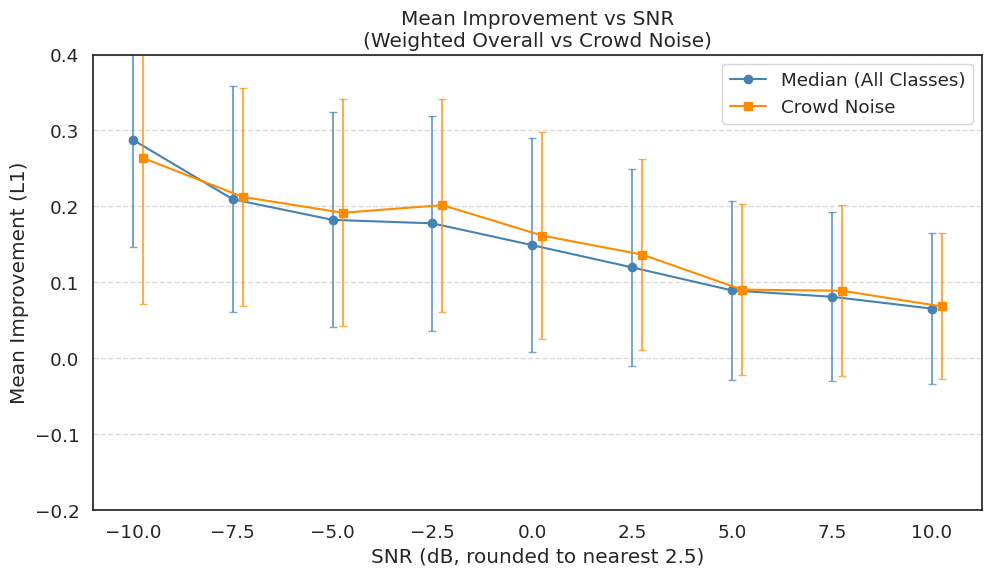

In [40]:
import numpy as np
plt.figure(figsize=(10, 6))

# Calculate weighted mean and std using counts
df_noise_stats["weighted_var"] = df_noise_stats["std_improvement"]**2 * df_noise_stats["count"]

grouped_all = df_noise_stats.groupby("snr_db_rounded").agg(
    mean_improvement=("mean_improvement", lambda x: np.median(x)), #weights=df_noise_stats.loc[x.index, "count"])),
    std_improvement=("weighted_var", lambda x: np.sqrt(np.sum(x) / np.sum(df_noise_stats.loc[x.index, "count"]))),
    total_count=("count", "sum")
).reset_index()

# Filter "Crowd" class
crowd_df = df_noise_stats[df_noise_stats["noise_class"] == "Crowd"]

# Plot weighted average
plt.plot(
    grouped_all["snr_db_rounded"],
    grouped_all["mean_improvement"],
    marker="o",
    label="Median (All Classes)",
    color="steelblue"
)
plt.errorbar(
    grouped_all["snr_db_rounded"],
    grouped_all["mean_improvement"],
    yerr=grouped_all["std_improvement"],
    fmt='none',
    capsize=3,
    color="steelblue",
    alpha=0.7
)

offset = 0.25
# --- Plot "Crowd" noise class (with slight offset) ---
plt.plot(
    crowd_df["snr_db_rounded"] + offset,
    crowd_df["mean_improvement"],
    marker="s",
    label="Crowd Noise",
    color="darkorange"
)
plt.errorbar(
    crowd_df["snr_db_rounded"] + offset,
    crowd_df["mean_improvement"],
    yerr=crowd_df["std_improvement"],
    fmt='none',
    capsize=3,
    color="darkorange",
    alpha=0.7
)

plt.xlabel("SNR (dB, rounded to nearest 2.5)")
plt.ylabel("Mean Improvement (L1)")
plt.title("Mean Improvement vs SNR\n(Weighted Overall vs Crowd Noise)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.ylim((-0.2, 0.4))
plt.show()


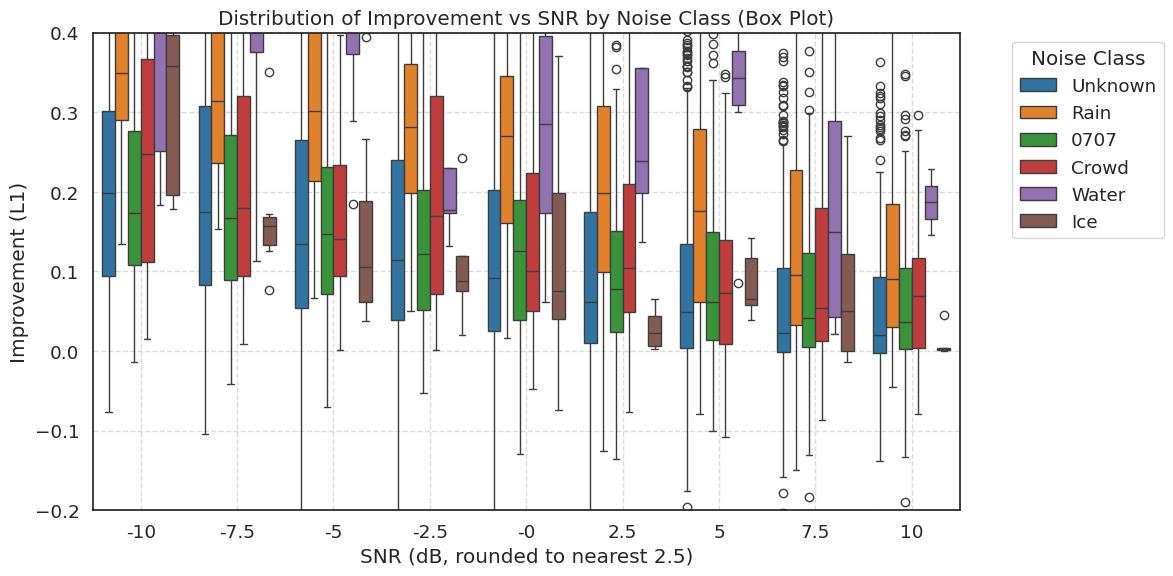

In [30]:
# Recalculate and clean labels
df_eval["snr_db_rounded"] = (df_eval["snr_db"] / 2.5).round() * 2.5

# Clean string labels and keep mapping for sorting
df_eval["snr_db_rounded_str"] = df_eval["snr_db_rounded"].apply(
    lambda x: f"{x:.1f}".rstrip('0').rstrip('.') if '.' in f"{x:.1f}" else f"{int(x)}"
)

# Sort labels numerically
ordered_snrs = sorted(df_eval["snr_db_rounded"].unique())
ordered_labels = [f"{x:.1f}".rstrip('0').rstrip('.') if '.' in f"{x:.1f}" else f"{int(x)}" for x in ordered_snrs]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_eval,
    x="snr_db_rounded_str",
    y="Improvement_L1",
    hue="noise_class",
    palette="tab10",
    order=ordered_labels  # ✅ apply numeric order
)

plt.xlabel("SNR (dB, rounded to nearest 2.5)")
plt.ylabel("Improvement (L1)")
plt.title("Distribution of Improvement vs SNR by Noise Class (Box Plot)")
plt.legend(title="Noise Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim((-0.2, 0.4))
plt.show()





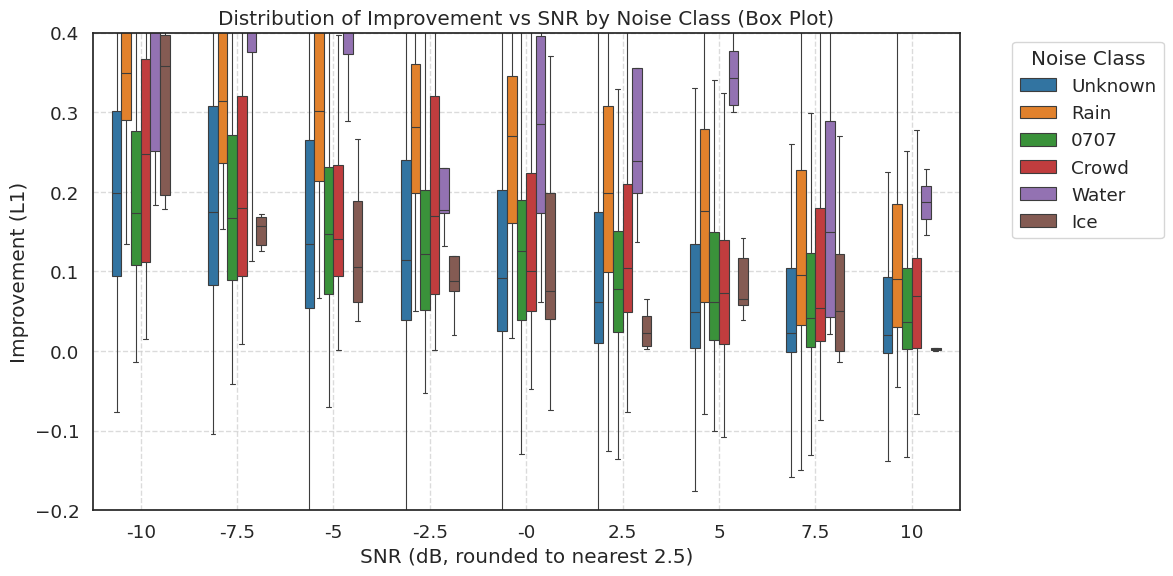

In [31]:

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_eval,
    x="snr_db_rounded_str",
    y="Improvement_L1",
    hue="noise_class",
    palette="tab10",
    order=ordered_labels,
    showfliers=False,  # Hide outliers
    linewidth=0.8,
    width=0.6
)

plt.xlabel("SNR (dB, rounded to nearest 2.5)")
plt.ylabel("Improvement (L1)")
plt.title("Distribution of Improvement vs SNR by Noise Class (Box Plot)")
plt.legend(title="Noise Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim((-0.2, 0.4))
plt.show()


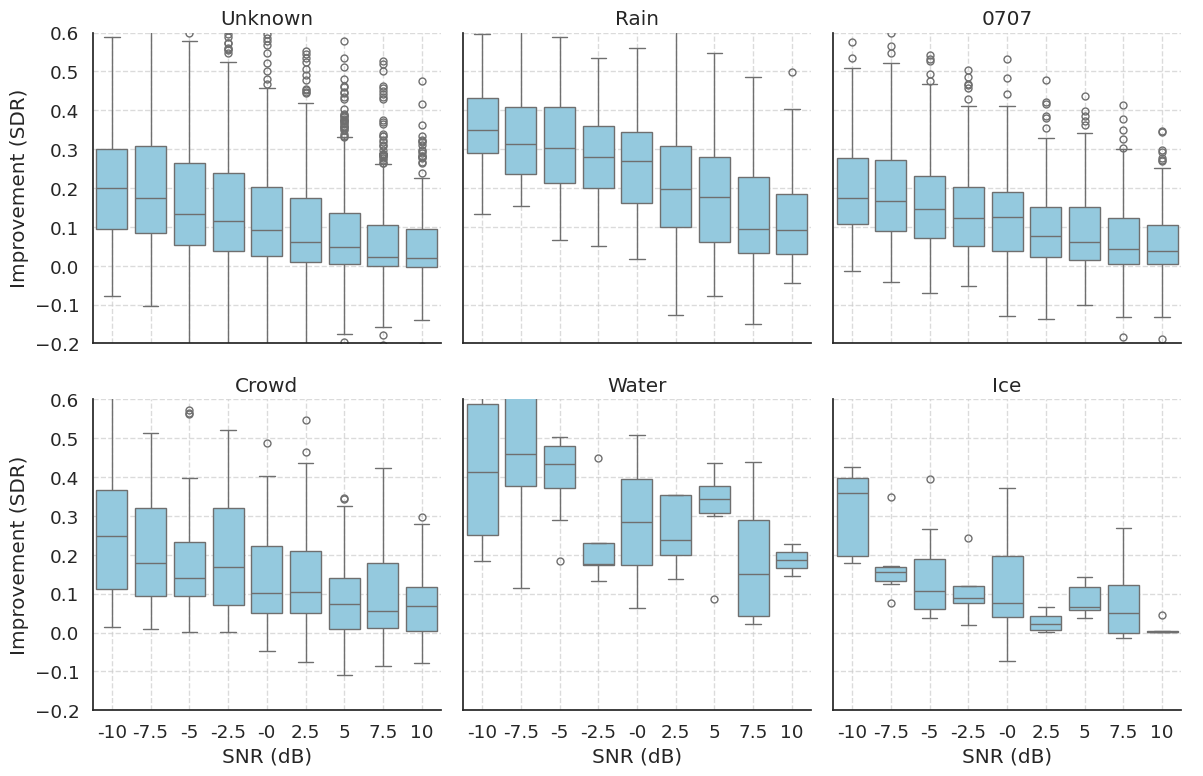

In [32]:
g = sns.catplot(
    data=df_eval,
    x="snr_db_rounded_str",
    y="Improvement_L1",
    col="noise_class",
    kind="box",
    col_wrap=3,
    order=ordered_labels,
    color="skyblue",  # ✅ uniform color for all boxes
    height=4,
    aspect=1
)

# Titles, labels, limits
g.set_titles(col_template="{col_name}")
g.set_axis_labels("SNR (dB)", "Improvement (SDR)")
g.set(ylim=(-0.2, 0.6))

# ✅ Add horizontal gridlines to all facets
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [33]:
# Save subset dataframe
df_subset.to_csv(output_path + f"df_subset_SNRdB_{SNRdB[0]}-{SNRdB[1]}.csv", index=False)

In [34]:
import gc

# Delete large variables

# Force garbage collection
gc.collect()

51480

In [35]:
def threshold_spectrogram(spectrogram, threshold):
    """
    Zeroes out all values in the spectrogram that are below the given threshold.

    Args:
        spectrogram (np.ndarray): Input 2D array.
        threshold (float): The threshold value.

    Returns:
        np.ndarray: The processed spectrogram with values below threshold set to zero.
    """
    spectrogram = np.where(spectrogram >= threshold, spectrogram, 0)
    return spectrogram

## View Spectrogram

In [36]:
sampling_rate = 44100  # 44.1 kHz audio
n_fft = 2048  # Adjust this for better resolution
freqs = np.linspace(0, sampling_rate / 2, n_fft // 2 + 1)  # STFT frequency bins

# Find indices corresponding to 0–4000 Hz
min_freq, max_freq = 0, 4000
freq_indices = np.where((freqs >= min_freq) & (freqs <= max_freq))[0]

# in spectrogram
index = 40

snr_db = np.array(df_subset.loc[index, "snr_db"])
print(snr_db)

# lets evaluate this from a l1 loss perspective
# reconstruct spectrogram
out_spectrogram = np.array(df_subset.loc[index, "out_track"][0])
out_spectrogram[df_subset.loc[index, "metadata"]["freq_indices_hf"], :] = resample_feature(np.array(df_subset.loc[index, "out_track"][1]), df_subset.loc[index, "metadata"]["hf_shape"])
out_spectrogram[df_subset.loc[index, "metadata"]["freq_indices_mf"], :] = resample_feature(np.array(df_subset.loc[index, "out_track"][2]), df_subset.loc[index, "metadata"]["mf_shape"])
out_spectrogram[df_subset.loc[index, "metadata"]["freq_indices_lf"], :] = resample_feature(np.array(df_subset.loc[index, "out_track"][3]), df_subset.loc[index, "metadata"]["lf_shape"])
out_spec_copy = out_spectrogram

out_spectrogram = threshold_spectrogram(out_spectrogram, np.mean(out_spectrogram)*0.75)

# out, with no join
out_track = np.array(df_subset.loc[index, "out_track"])[0]

# out spectrogram
in_spectrogram = df_subset.loc[index, "in_track"][0]

# target
tar_track = np.array(df_subset.loc[index, "tar_track"])[0]

# inverse normalisation to 0 - 1
out_spectrogram = (out_spectrogram - 0.5) * 2
out_track = (out_track - 0.5) * 2
in_spectrogram = (in_spectrogram - 0.5) * 2
tar_track = (tar_track - 0.5) * 2

# Inverse standardisation
input_temp = tar_track
in_spectrogram = scalers["input_features_spectrogram"].inverse_transform(in_spectrogram.reshape(1, -1)).reshape(input_temp.shape)

out_spectrogram = scalers["target_features_spectrogram"].inverse_transform(out_spectrogram.reshape(1, -1)).reshape(input_temp.shape)
out_track = scalers["target_features_spectrogram"].inverse_transform(out_track.reshape(1, -1)).reshape(input_temp.shape)

tar_track = scalers["target_features_spectrogram"].inverse_transform(tar_track.reshape(1, -1)).reshape(input_temp.shape)

# plot things
# Plot spectrograms
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

axes[0].imshow(in_spectrogram, aspect="auto", cmap="magma", origin="lower")
axes[0].set_title("Noisy Input (Log Scale)")
axes[0].set_yscale("log")
axes[0].set_ylim((1, 1000))

axes[1].imshow(out_spectrogram, aspect="auto", cmap="magma", origin="lower")
axes[1].set_title("Denoised Output (Log Scale) - reconstructed")
axes[1].set_yscale("log")
axes[1].set_ylim((1, 1000))

axes[2].imshow(out_track, aspect="auto", cmap="magma", origin="lower")
axes[2].set_title("Denoised Output (Log Scale)")
axes[2].set_yscale("log")
axes[2].set_ylim((1, 1000))

axes[3].imshow(tar_track, aspect="auto", cmap="magma", origin="lower")
axes[3].set_title("Clean Target (Log Scale)")
axes[3].set_yscale("log")
axes[3].set_ylim((1, 1000))

plt.tight_layout()
plt.show()

4.323528289794922


ValueError: operands could not be broadcast together with shapes (1,44800) (179375,) (1,44800) 

In [ ]:
def magphase_to_waveform(magnitude, phase, audio_length=44100):
    """
    Converts a spectrogram image back into an audio waveform.

    Parameters:
        image (np.array): Spectrogram image (3 channels).
        sr (int): Sampling rate.

    Returns:
        np.array: Reconstructed audio waveform.
    """
    stft = magnitude * np.exp(1j * phase)
    return librosa.istft(stft, length=audio_length)

In [ ]:
import scipy.io.wavfile
from google.colab import files
import librosa

# output waveform
phase = df_subset.loc[index, "metadata"]["phase"]
#phase = scalers["input_features_phase"].inverse_transform(phase.reshape(1, -1)).reshape(input_temp.shape)
print(np.max(phase))
print(np.min(phase))

# reverse log scale
out_spectrogram = librosa.db_to_amplitude(out_spectrogram)
signal = magphase_to_waveform(out_spectrogram, phase, 44100 * 2)

# Save as WAV file
output_filename = f"denoised_audio_{index}:{snr_db}.wav"
scipy.io.wavfile.write(output_filename, rate=44100, data=signal)  # 16-bit PCM

# Download the file
files.download(output_filename)

tar_track = librosa.db_to_amplitude(tar_track)
signal = magphase_to_waveform(tar_track, phase, 44100 * 2)

# Save as WAV file
output_filename = f"audio_{index}:{snr_db}.wav"
scipy.io.wavfile.write(output_filename, rate=44100, data=signal)  # 16-bit PCM

# Download the file
files.download(output_filename)

in_spectrogram = librosa.db_to_amplitude(in_spectrogram)
signal = magphase_to_waveform(in_spectrogram, phase, 44100 * 2)

# Save as WAV file
output_filename = f"noisy_audio_{index}:{snr_db}.wav"
scipy.io.wavfile.write(output_filename, rate=44100, data=signal)  # 16-bit PCM

# Download the file
files.download(output_filename)

## Plot Results

---